<a href="https://colab.research.google.com/github/natsakh/IAD/blob/main/Pr_2/2_1_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Get the Data

In [2]:
#https://www.kaggle.com/uciml/iris

url='https://drive.google.com/file/d/10vsX925g8ff4QdgQpnsguo4DHUHOPgAL/view?usp=sharing'
url_='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url_)

In [3]:
df.shape

(150, 6)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
X = df.drop(['Id', 'Species'], axis = 1)
y = df['Species']

In [7]:
set(y) ## labels

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [8]:
print(type(X), type(y))
print(X.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(150, 4) (150,)


## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
# stratify=y: зберігає ті самі пропорції класів у train і test (стратифіковане розбиття)
# Особливо важливо для незбалансованих даних.

In [10]:
print(type(X), type(y))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(120, 4) (120,)
(30, 4) (30,)


## Decision Tree  
**Note: scaling is NOT required for trees**

**Найважливіші параметри (коротко)**

criterion={'gini','entropy'} — функція розщеплення  

max_depth=None — максимальна глибина дерева (контроль пере/недонавчання)  

min_samples_split=2 — мінімум зразків, щоб вузол ділився  

min_samples_leaf=1 — мінімум зразків у листку  

class_weight=None — корисно для незбалансованих даних ('balanced')  

random_state — для відтворюваності  



In [11]:
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=2,
    random_state=42
)

In [12]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=42)

In [13]:
y_pred = model.predict(X_test)

## Model Evaluation

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [16]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


## Visualization

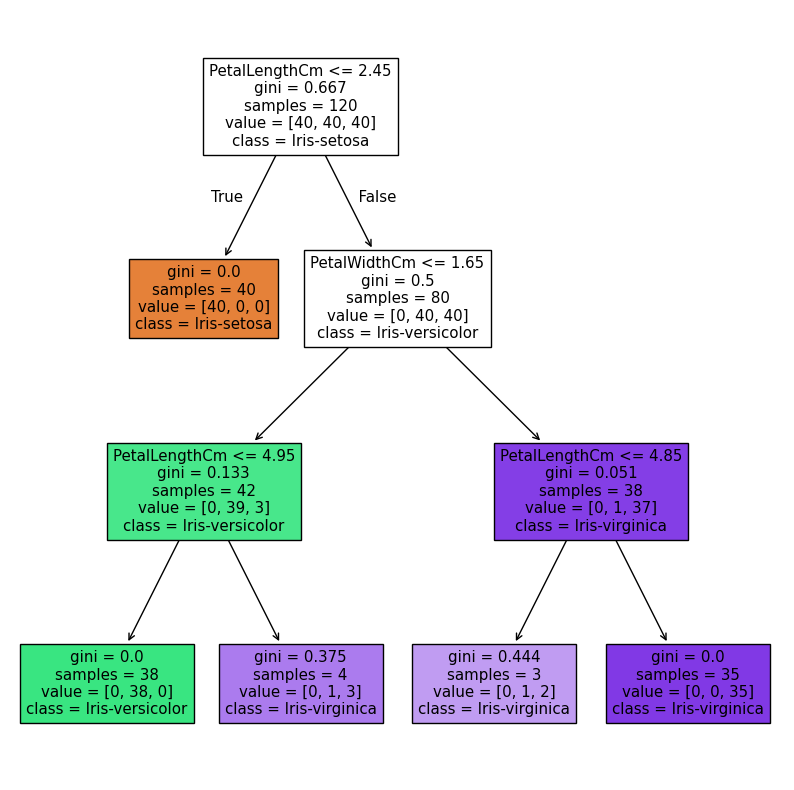

In [17]:
plt.figure(figsize = (10, 10))
plot_tree(model, feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
          class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled = True)
plt.show()

In [18]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}